In [ ]:
import numpy as np
import pandas as pd
from datetime import date
import random
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textblob import TextBlob
from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
upload = files.upload()

Saving data.csv to data (2).csv


In [ ]:
#Reading the Dataset

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,rating,review_title,review_description,date,location,up_votes,down_votes
0,5,Fabulous!,Best smart phone under this price range compar...,4 months ago,", Debipur",7504,1005
1,5,Great product,50% extra RAM compared to iPhone 13 and other ...,3 months ago,", Rajgarh",1184,165
2,5,Best in the market!,See Low light photos are amazing..,6 months ago,", Mahrajganj Mahrajganj District",3316,622
3,5,Must buy!,Damn such a great phone. Camera is really good...,4 months ago,", Bhubaneswar",987,206
4,5,Fabulous!,"Excellent smart phone, Good battery backup and...",4 months ago,", Bagula",2455,645


In [ ]:
# The data set Contains 7 Column
    # rating : rating given out of 5
    # review_title : title for review 
    # review_description : detailed review
    # date : review posted in months ago 
    # location : 

In [ ]:
df.shape

(970, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rating              970 non-null    int64 
 1   review_title        970 non-null    object
 2   review_description  970 non-null    object
 3   date                970 non-null    object
 4   location            970 non-null    object
 5   up_votes            970 non-null    int64 
 6   down_votes          970 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 53.2+ KB


In [ ]:
df.isnull().sum()

rating                0
review_title          0
review_description    0
date                  0
location              0
up_votes              0
down_votes            0
dtype: int64

In [ ]:

# Data Preprocessing

In [ ]:
# removing unwanted characters from location column

In [ ]:
df['location'] = df.location.str.replace(',', '')
df['location'] = df.location.str.strip()

In [ ]:
df.head()

,rating,review_title,review_description,date,location,up_votes,down_votes
0,5,Fabulous!,Best smart phone under this price range compar...,4 months ago,Debipur,7504,1005
1,5,Great product,50% extra RAM compared to iPhone 13 and other ...,3 months ago,Rajgarh,1184,165
2,5,Best in the market!,See Low light photos are amazing..,6 months ago,Mahrajganj Mahrajganj District,3316,622
3,5,Must buy!,Damn such a great phone. Camera is really good...,4 months ago,Bhubaneswar,987,206
4,5,Fabulous!,"Excellent smart phone, Good battery backup and...",4 months ago,Bagula,2455,645


In [ ]:
df.location.str.strip()

0                             Debipur
1                             Rajgarh
2      Mahrajganj Mahrajganj District
3                         Bhubaneswar
4                              Bagula
                    ...              
965                          Anantnag
966                         Ghaziabad
967                         Bengaluru
968                       Bhupalpalle
969                        Ahmadnagar
Name: location, Length: 970, dtype: object

In [ ]:
# assigning actual dates

In [ ]:
# function to convert posted_ago_month into actual date of post
from dateutil.relativedelta import relativedelta

def get_date_of_post(x):
    current_date = date.today()
    posted_ago_months = x.split(' ')
    if posted_ago_months[0].isdigit():
        temp = int(posted_ago_months[0]) 
        date_of_post = str(current_date - relativedelta(months= temp))
        return date_of_post
    else:
        return np.nan


In [ ]:
get_date_of_post("4 months ago")

'2023-01-20'

In [ ]:
# getting current date
today = date.today()
_today = today.strftime("%d-%m-%Y")
_today

'20-05-2023'

In [ ]:
df['date'] = df['date'].apply(get_date_of_post)

In [ ]:
df.head()

,rating,review_title,review_description,date,location,up_votes,down_votes
0,5,Fabulous!,Best smart phone under this price range compar...,2023-01-20,Debipur,7504,1005
1,5,Great product,50% extra RAM compared to iPhone 13 and other ...,2023-02-20,Rajgarh,1184,165
2,5,Best in the market!,See Low light photos are amazing..,2022-11-20,Mahrajganj Mahrajganj District,3316,622
3,5,Must buy!,Damn such a great phone. Camera is really good...,2023-01-20,Bhubaneswar,987,206
4,5,Fabulous!,"Excellent smart phone, Good battery backup and...",2023-01-20,Bagula,2455,645


In [ ]:
#changing the data type of columns rating to int

df['rating'] = df['rating'].astype(int)


In [ ]:
df.dtypes

rating                 int64
review_title          object
review_description    object
date                  object
location              object
up_votes               int64
down_votes             int64
dtype: object

In [ ]:
# checking for any invalid date

df['date'].isna().sum()

5

In [ ]:
# imputing missing dates with random date from the column

In [ ]:

def replace_na(x):
    vc = x.value_counts()
    r = random.choices(vc.keys(), weights=vc.values, k=x.isnull().sum())
    x[x.isnull()] = r
    return x

df.apply(lambda x: replace_na(x))

,rating,review_title,review_description,date,location,up_votes,down_votes
0,5.0,Fabulous!,Best smart phone under this price range compar...,2023-01-20,Debipur,7504.0,1005.0
1,5.0,Great product,50% extra RAM compared to iPhone 13 and other ...,2023-02-20,Rajgarh,1184.0,165.0
2,5.0,Best in the market!,See Low light photos are amazing..,2022-11-20,Mahrajganj Mahrajganj District,3316.0,622.0
3,5.0,Must buy!,Damn such a great phone. Camera is really good...,2023-01-20,Bhubaneswar,987.0,206.0
4,5.0,Fabulous!,"Excellent smart phone, Good battery backup and...",2023-01-20,Bagula,2455.0,645.0
...,...,...,...,...,...,...,...
965,5.0,Must buy!,display may be if 90hz it will be good at this...,2023-01-20,Anantnag,35.0,17.0
966,5.0,Excellent,Reasons to get it over regular 13,2023-02-20,Ghaziabad,57.0,15.0
967,5.0,Wonderful,- 50 percent extra ram,2023-03-20,Bengaluru,63.0,11.0
968,5.0,Super!,- Better camera sensors,2022-12-20,Bhupalpalle,33.0,31.0


In [ ]:
df['date'].isna().sum()

0

In [ ]:
#Normalizing the up_votes and down_votes


In [ ]:
#using min-max scaler

scaler = MinMaxScaler()
df[["up_votes"]] = scaler.fit_transform(df[["up_votes"]])
df[["down_votes"]] = scaler.fit_transform(df[["down_votes"]])

In [ ]:
# data frame after normalizing the votes

df.head()

,rating,review_title,review_description,date,location,up_votes,down_votes
0,5.0,Fabulous!,Best smart phone under this price range compar...,2023-01-20,Debipur,1.000000,0.793839
1,5.0,Great product,50% extra RAM compared to iPhone 13 and other ...,2023-02-20,Rajgarh,0.157783,0.130332
2,5.0,Best in the market!,See Low light photos are amazing..,2022-11-20,Mahrajganj Mahrajganj District,0.441898,0.491311
3,5.0,Must buy!,Damn such a great phone. Camera is really good...,2023-01-20,Bhubaneswar,0.131530,0.162717
4,5.0,Fabulous!,"Excellent smart phone, Good battery backup and...",2023-01-20,Bagula,0.327159,0.509479


In [ ]:
# now the data is ready to be used

In [ ]:
#checking unique values for each column

n = df.nunique(axis = 0)
n

rating                  5
review_title           54
review_description    782
date                   29
location              465
up_votes               82
down_votes             48
dtype: int64

In [ ]:
#distribuition of ratings

In [ ]:

rating_df = pd.DataFrame(df['rating'].value_counts().reset_index())
rating_df.columns=['rating','count']

fig = px.bar(rating_df,x='rating',y='count',
            color_discrete_sequence=['purple'])
fig.update_layout(title_text='Distribution of Ratings',title_x=0.5
                  ,template='plotly_dark')
fig.show()

In [ ]:
# remoing stop words and creating corpus

stop_words = stopwords.words('english')
corpus = []
for i in range(len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['review_title'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus.append(text)

In [ ]:
corpus

['fabulous',
 'great product',
 'best market',
 'must buy',
 'fabulous',
 'classy product',
 'perfect product',
 'classy product',
 'fabulous',
 'highly recommended',
 'perfect product',
 'excellent',
 'useless product',
 'bad quality',
 'decent product',
 'wow',
 'terrific purchase',
 'pretty good',
 'wonderful',
 'highly recommended',
 'must buy',
 'great product',
 'great product',
 'fabulous',
 'delightful',
 'simply awesome',
 'delightful',
 'great product',
 'must buy',
 'excellent',
 'hated',
 'good',
 'worth every penny',
 'hated',
 'terrific purchase',
 'job',
 'terrific',
 'terrific purchase',
 'perfect product',
 'mind blowing purchase',
 'value money',
 'wonderful',
 'brilliant',
 'super',
 'fabulous',
 'classy product',
 'fabulous',
 'wonderful',
 'worth every penny',
 'nice product',
 'highly recommended',
 'excellent',
 'classy product',
 'worth every penny',
 'wonderful',
 'horrible',
 'awesome',
 'best market',
 'fabulous',
 'absolute rubbish',
 'classy product',
 'fab

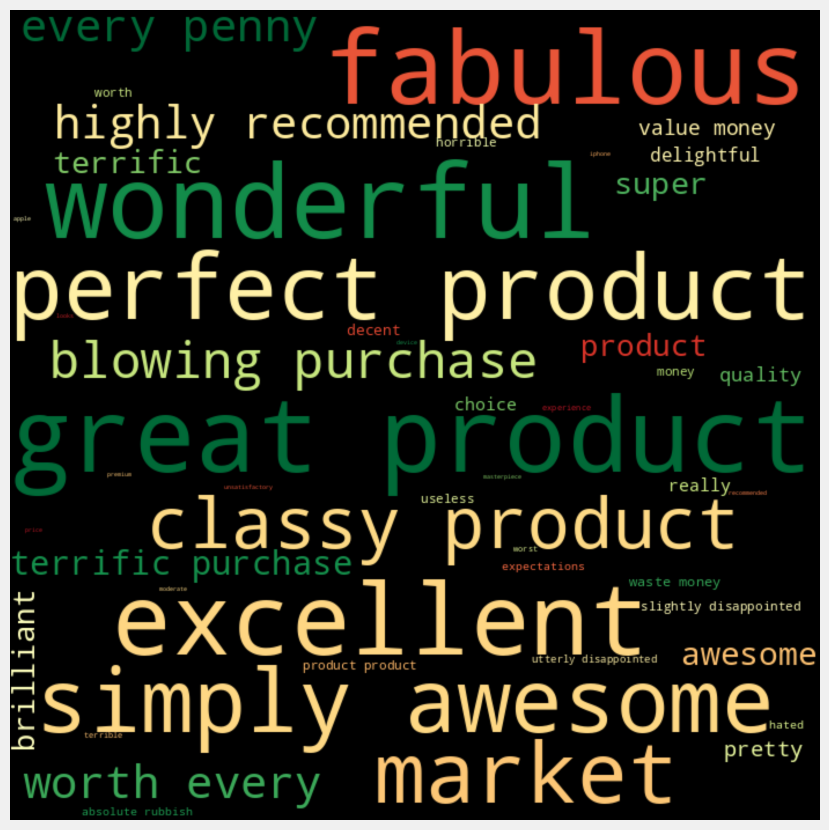

In [ ]:
word_cloud = WordCloud(width = 700,
                      height = 700,
                      colormap = 'RdYlGn',
                      margin = 0,
                      max_words = 200,
                      min_word_length = 5,
                      max_font_size = 110,
                      background_color = 'black').generate(' '.join(corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

In [ ]:
# word cloud of review_description

In [ ]:
stop_words = stopwords.words('english')
corpus = []
for i in range(len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['review_description'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus.append(text)

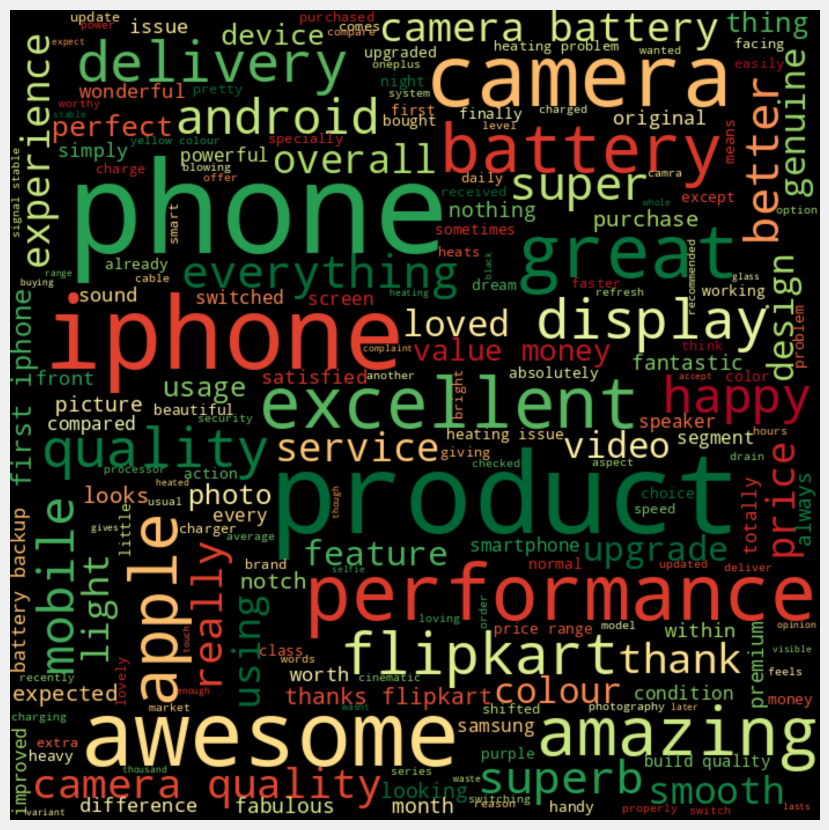

In [ ]:
word_cloud = WordCloud(width = 700,
                      height = 700,
                      colormap = 'RdYlGn',
                      margin = 0,
                      max_words = 200,
                      min_word_length = 5,
                      max_font_size = 110,
                      background_color = 'black').generate(' '.join(corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

In [ ]:
# Visualizing the Most Frequent Words

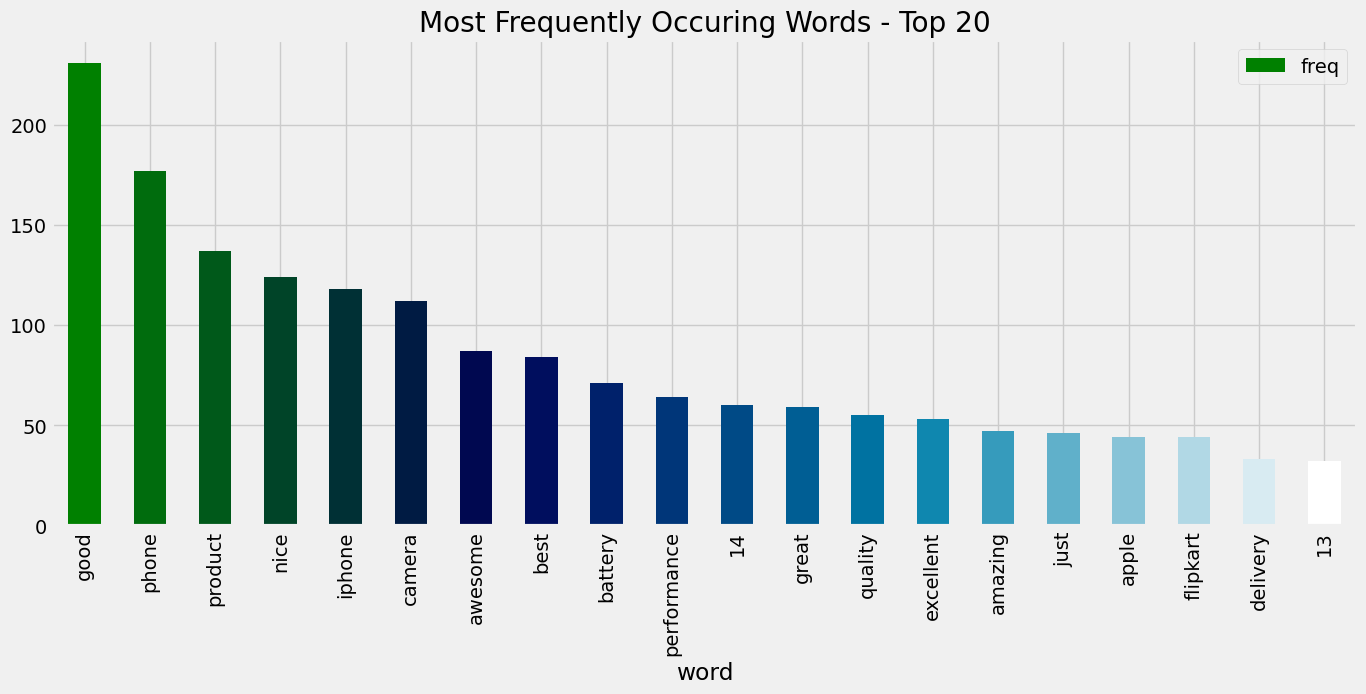

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.review_description)
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

In [ ]:
df['length'] = df['review_description'].apply(len)

In [ ]:
df.head()

,rating,review_title,review_description,date,location,up_votes,down_votes,length
0,5.0,Fabulous!,Best smart phone under this price range compar...,2023-01-20,Debipur,1.000000,0.793839,177
1,5.0,Great product,50% extra RAM compared to iPhone 13 and other ...,2023-02-20,Rajgarh,0.157783,0.130332,111
2,5.0,Best in the market!,See Low light photos are amazing..,2022-11-20,Mahrajganj Mahrajganj District,0.441898,0.491311,34
3,5.0,Must buy!,Damn such a great phone. Camera is really good...,2023-01-20,Bhubaneswar,0.131530,0.162717,456
4,5.0,Fabulous!,"Excellent smart phone, Good battery backup and...",2023-01-20,Bagula,0.327159,0.509479,93


In [ ]:
# Using TextBlob to perform Sentiment Analysis on the reviews 


In [ ]:
def get_popularity(review):
    textblob = TextBlob(str(review.encode('utf-8')))
    return textblob.sentiment.polarity 

df['polarity_score'] = df['review_description'].apply(get_popularity)

In [ ]:
def get_subjectivity(review):
    textblob = TextBlob(str(review.encode('utf-8')))
    return textblob.sentiment.subjectivity

df['subjectivity_score'] = df['review_description'].apply(get_subjectivity)


In [ ]:
df.head()

,rating,review_title,review_description,date,location,up_votes,down_votes,length,polarity_score,subjectivity_score
0,5.0,Fabulous!,Best smart phone under this price range compar...,2023-01-20,Debipur,1.000000,0.793839,177,0.364881,0.402976
1,5.0,Great product,50% extra RAM compared to iPhone 13 and other ...,2023-02-20,Rajgarh,0.157783,0.130332,111,0.435000,0.455000
2,5.0,Best in the market!,See Low light photos are amazing..,2022-11-20,Mahrajganj Mahrajganj District,0.441898,0.491311,34,0.333333,0.633333
3,5.0,Must buy!,Damn such a great phone. Camera is really good...,2023-01-20,Bhubaneswar,0.131530,0.162717,456,0.160784,0.459804
4,5.0,Fabulous!,"Excellent smart phone, Good battery backup and...",2023-01-20,Bagula,0.327159,0.509479,93,0.704857,0.724571


In [ ]:
#rewriting the polarity_score by considering the count of up_votes and down_votes of review
#decreasing 10% for down_votes
#increaising 10% for up_votes 
df.head()

,rating,review_title,review_description,date,location,up_votes,down_votes,length,polarity_score,subjectivity_score,char_count
0,5.0,Fabulous!,Best smart phone under this price range compar...,2023-01-20,Debipur,1.000000,0.793839,177,0.385497,0.402976,177
1,5.0,Great product,50% extra RAM compared to iPhone 13 and other ...,2023-02-20,Rajgarh,0.157783,0.130332,111,0.437745,0.455000,111
2,5.0,Best in the market!,See Low light photos are amazing..,2022-11-20,Mahrajganj Mahrajganj District,0.441898,0.491311,34,0.328392,0.633333,34
3,5.0,Must buy!,Damn such a great phone. Camera is really good...,2023-01-20,Bhubaneswar,0.131530,0.162717,456,0.157666,0.459804,456
4,5.0,Fabulous!,"Excellent smart phone, Good battery backup and...",2023-01-20,Bagula,0.327159,0.509479,93,0.686625,0.724571,93


In [ ]:
df.describe()

,rating,up_votes,down_votes,length,polarity_score,subjectivity_score,char_count
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,4.646392,0.003719,0.005673,40.375258,0.500879,0.608896,40.375258
std,0.894723,0.038138,0.050775,55.850488,0.368392,0.337799,55.850488
min,1.000000,0.000000,0.000000,1.000000,-1.000237,0.000000,1.000000
25%,5.000000,0.000000,0.000000,9.000000,0.229437,0.400000,9.000000
50%,5.000000,0.000000,0.000000,19.000000,0.599869,0.600000,19.000000
75%,5.000000,0.000267,0.000000,47.000000,0.750013,1.000000,47.000000
max,5.000000,1.000000,1.000000,500.000000,1.002080,1.000000,500.000000


In [ ]:
df['polarity_score'] = df['polarity_score'] + (df['up_votes'] * 0.10)
df.head()

,rating,review_title,review_description,date,location,up_votes,down_votes,length,polarity_score,subjectivity_score
0,5.0,Fabulous!,Best smart phone under this price range compar...,2023-01-20,Debipur,1.000000,0.793839,177,0.464881,0.402976
1,5.0,Great product,50% extra RAM compared to iPhone 13 and other ...,2023-02-20,Rajgarh,0.157783,0.130332,111,0.450778,0.455000
2,5.0,Best in the market!,See Low light photos are amazing..,2022-11-20,Mahrajganj Mahrajganj District,0.441898,0.491311,34,0.377523,0.633333
3,5.0,Must buy!,Damn such a great phone. Camera is really good...,2023-01-20,Bhubaneswar,0.131530,0.162717,456,0.173937,0.459804
4,5.0,Fabulous!,"Excellent smart phone, Good battery backup and...",2023-01-20,Bagula,0.327159,0.509479,93,0.737573,0.724571


In [ ]:
df['polarity_score'] =  df['polarity_score'] - (df['down_votes'] * 0.10)
df.head()

,rating,review_title,review_description,date,location,up_votes,down_votes,length,polarity_score,subjectivity_score
0,5.0,Fabulous!,Best smart phone under this price range compar...,2023-01-20,Debipur,1.000000,0.793839,177,0.385497,0.402976
1,5.0,Great product,50% extra RAM compared to iPhone 13 and other ...,2023-02-20,Rajgarh,0.157783,0.130332,111,0.437745,0.455000
2,5.0,Best in the market!,See Low light photos are amazing..,2022-11-20,Mahrajganj Mahrajganj District,0.441898,0.491311,34,0.328392,0.633333
3,5.0,Must buy!,Damn such a great phone. Camera is really good...,2023-01-20,Bhubaneswar,0.131530,0.162717,456,0.157666,0.459804
4,5.0,Fabulous!,"Excellent smart phone, Good battery backup and...",2023-01-20,Bagula,0.327159,0.509479,93,0.686625,0.724571


In [ ]:
#using min-max scaler

df.describe()

,rating,up_votes,down_votes,length,polarity_score,subjectivity_score
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,4.646392,0.003719,0.005673,40.375258,0.500879,0.608896
std,0.894723,0.038138,0.050775,55.850488,0.368392,0.337799
min,1.000000,0.000000,0.000000,1.000000,-1.000237,0.000000
25%,5.000000,0.000000,0.000000,9.000000,0.229437,0.400000
50%,5.000000,0.000000,0.000000,19.000000,0.599869,0.600000
75%,5.000000,0.000267,0.000000,47.000000,0.750013,1.000000
max,5.000000,1.000000,1.000000,500.000000,1.002080,1.000000


In [ ]:
df[['length','polarity_score','subjectivity_score']].describe()



,length,polarity_score,subjectivity_score
count,970.000000,970.000000,970.000000
mean,40.375258,0.500879,0.608896
std,55.850488,0.368392,0.337799
min,1.000000,-1.000237,0.000000
25%,9.000000,0.229437,0.400000
50%,19.000000,0.599869,0.600000
75%,47.000000,0.750013,1.000000
max,500.000000,1.002080,1.000000


In [ ]:
#calculating character count of review

df['char_count'] = df['review_description'].apply(len)


In [ ]:
#calculating word count of the review

df['word_count'] = df['review_description'].apply(lambda x: len(x.split()))


In [ ]:
df['word_density'] = df['char_count'] / (df['word_count']+1)

In [ ]:
df.head()

,rating,review_title,review_description,date,location,up_votes,down_votes,length,polarity_score,subjectivity_score,char_count,word_count,word_density
0,5.0,Fabulous!,Best smart phone under this price range compar...,2023-01-20,Debipur,1.000000,0.793839,177,0.385497,0.402976,177,30,5.709677
1,5.0,Great product,50% extra RAM compared to iPhone 13 and other ...,2023-02-20,Rajgarh,0.157783,0.130332,111,0.437745,0.455000,111,23,4.625000
2,5.0,Best in the market!,See Low light photos are amazing..,2022-11-20,Mahrajganj Mahrajganj District,0.441898,0.491311,34,0.328392,0.633333,34,6,4.857143
3,5.0,Must buy!,Damn such a great phone. Camera is really good...,2023-01-20,Bhubaneswar,0.131530,0.162717,456,0.157666,0.459804,456,85,5.302326
4,5.0,Fabulous!,"Excellent smart phone, Good battery backup and...",2023-01-20,Bagula,0.327159,0.509479,93,0.686625,0.724571,93,14,6.200000


In [ ]:
df[['char_count','word_count','word_density']].describe()

,char_count,word_count,word_density
count,970.000000,970.000000,970.000000
mean,40.375258,7.287629,4.196745
std,55.850488,10.184407,1.327056
min,1.000000,1.000000,0.500000
25%,9.000000,2.000000,3.333333
50%,19.000000,3.000000,4.333333
75%,47.000000,8.000000,5.166667
max,500.000000,85.000000,9.000000


<ipython-input-184-300f53676616>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-184-300f53676616>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




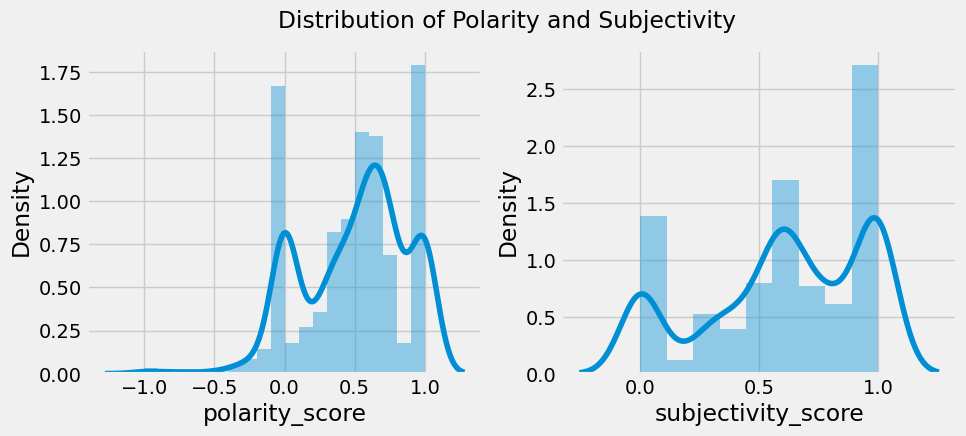

In [ ]:
# Visualizing Distribution of Polarity and Subjectivity
plt.rcParams['figure.figsize'] = (10, 4)
plt.subplot(1, 2, 1)
sns.distplot(df['polarity_score'])
plt.subplot(1, 2, 2)
sns.distplot(df['subjectivity_score'])
plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

In [ ]:
#relation between Polarity And Subjectivity

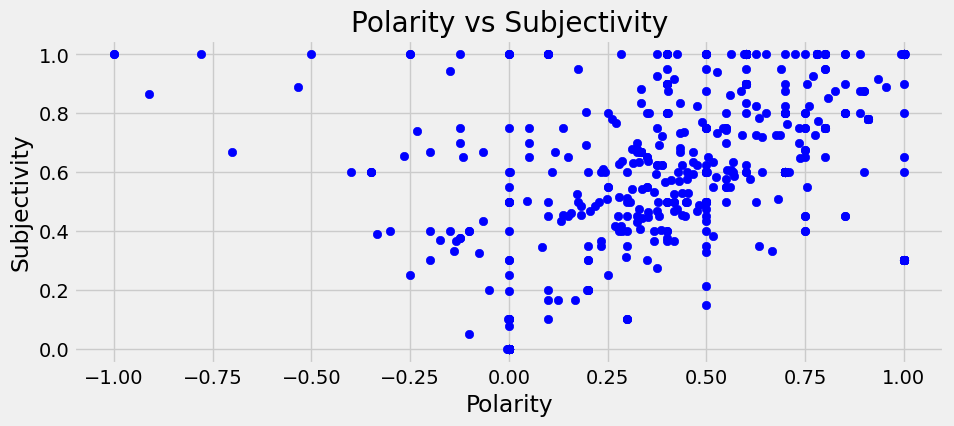

In [ ]:
plt.scatter(list(df['polarity_score']), list(df['subjectivity_score']), c ="blue")
plt.title('Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
#Show Sentiments

In [ ]:
def get_polarity(polarity_score):
    if polarity_score == 0:
        return "Neutral"
    elif polarity_score>0 and polarity_score<=0.3:
        return "Weakly Positive"
    elif polarity_score>0.3 and polarity_score<=0.6:
        return "Positive"
    elif polarity_score>0.6:
        return "Strongly Positive"
    elif polarity_score>-0.3 and polarity_score<=0:
        return "Weakly Negative"
    elif polarity_score>-0.6 and polarity_score<=-0.3:
        return "Negative"
    elif polarity_score <=-0.6:
        return "Strongly Negative"
    
    

In [ ]:
df['polarity'] = df['polarity_score'].apply(get_polarity)

In [ ]:
df.head()

,rating,review_title,review_description,date,location,up_votes,down_votes,length,polarity_score,subjectivity_score,char_count,word_count,word_density,polarity
0,5.0,Fabulous!,Best smart phone under this price range compar...,2023-01-20,Debipur,1.000000,0.793839,177,0.385497,0.402976,177,30,5.709677,Positive
1,5.0,Great product,50% extra RAM compared to iPhone 13 and other ...,2023-02-20,Rajgarh,0.157783,0.130332,111,0.437745,0.455000,111,23,4.625000,Positive
2,5.0,Best in the market!,See Low light photos are amazing..,2022-11-20,Mahrajganj Mahrajganj District,0.441898,0.491311,34,0.328392,0.633333,34,6,4.857143,Positive
3,5.0,Must buy!,Damn such a great phone. Camera is really good...,2023-01-20,Bhubaneswar,0.131530,0.162717,456,0.157666,0.459804,456,85,5.302326,Weakly Positive
4,5.0,Fabulous!,"Excellent smart phone, Good battery backup and...",2023-01-20,Bagula,0.327159,0.509479,93,0.686625,0.724571,93,14,6.200000,Strongly Positive


In [ ]:
df['polarity'].value_counts()

Strongly Positive    418
Positive             279
Weakly Positive      116
Neutral               81
Weakly Negative       63
Negative               8
Strongly Negative      5
Name: polarity, dtype: int64

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df['polarity'].value_counts().index.tolist(),
                             values=df['polarity'].value_counts().tolist())])

fig.update_layout(title_text='Proportion of Sentiments',title_x=0.5,
                  template='plotly_dark')
fig.show()

In [ ]:
def get_data(df,sentiment):
    s_df = df[df['polarity']==sentiment].reset_index()
    
    s_corpus = []
    for i in range(0,len(s_df)):
        text = re.sub('[^a-zA-Z]', ' ', s_df['review_description'][i])
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stop_words]
        text = ' '.join(text)
        s_corpus.append(text)
    return s_corpus

pos_corpus = get_data(df,'Positive')
pos_corpus += (get_data(df,'Strongly Positive'))
pos_corpus += (get_data(df,'Weakly Positive'))

neg_corpus = get_data(df,'Weakly Negative')
neg_corpus += (get_data(df,'Negative'))
neg_corpus += (get_data(df,'Strongly Negative'))

nt_corpus = get_data(df,'Neutral')

In [ ]:
pos_corpus

['best smart phone price range compare phones see overall build quality performance camera autofocus video action mode awesome',
 'extra ram compared iphone features best time upgrade iphone happy',
 'see low light photos amazing',
 'switch iphone iphone powerful chipset gives smooth performance lags fancy ui delivers best',
 'camera best battery giving full day speaker sounds wide clear',
 'happy iphone wonderful phone specially powerful camera perfect screen size potentially battery life make worthy',
 'nice',
 'totally worth selling kidney buying amazing phone camera makes phone',
 'nice apple',
 'fabulous mobile phone fall apple first apple product use',
 'good price high',
 'product awesome price little high',
 'android ios good experience videos photos quality far better mobile used past',
 'phone good use phone days realised phone well',
 'loved first iphone btw box quality wasnt good',
 'super',
 'nice one',
 'love phone purchased gift husband camera battery everything fine tha

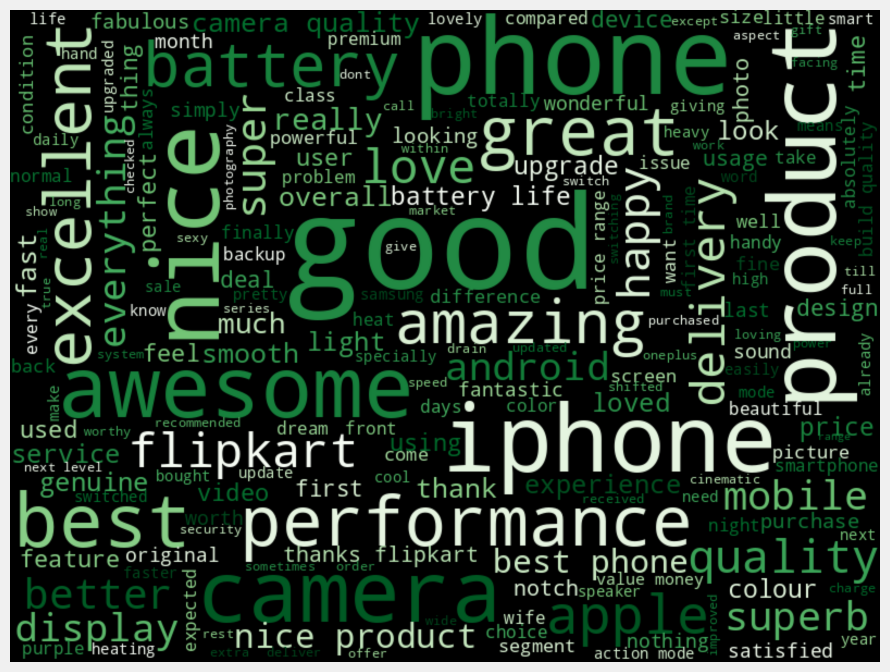

In [ ]:
#positive sentiment wordcloud

word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'Greens', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(pos_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

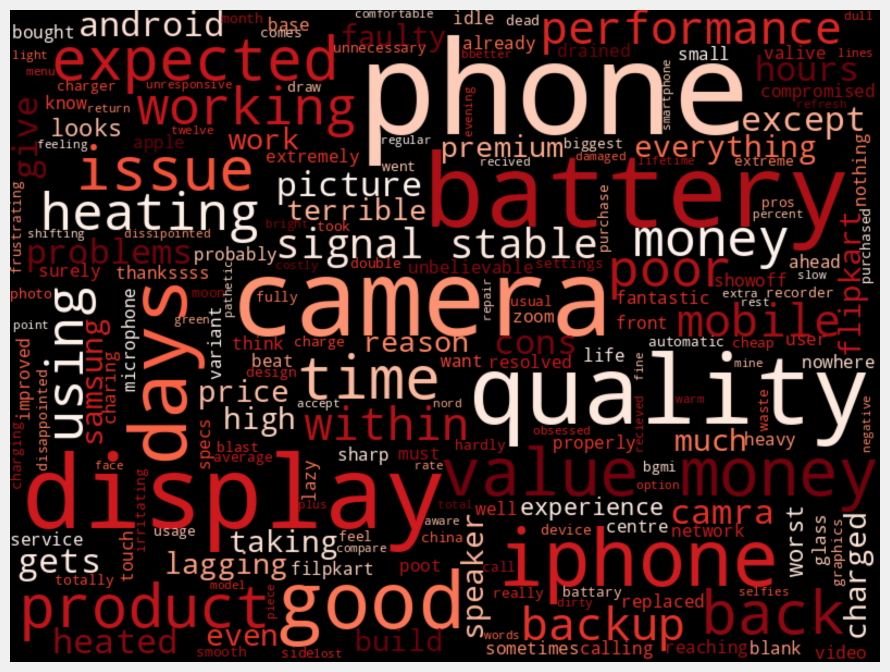

In [ ]:
#Negative Sentiment wordcloud
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'Reds', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(neg_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

In [ ]:
#neutral sentiment wordcloud

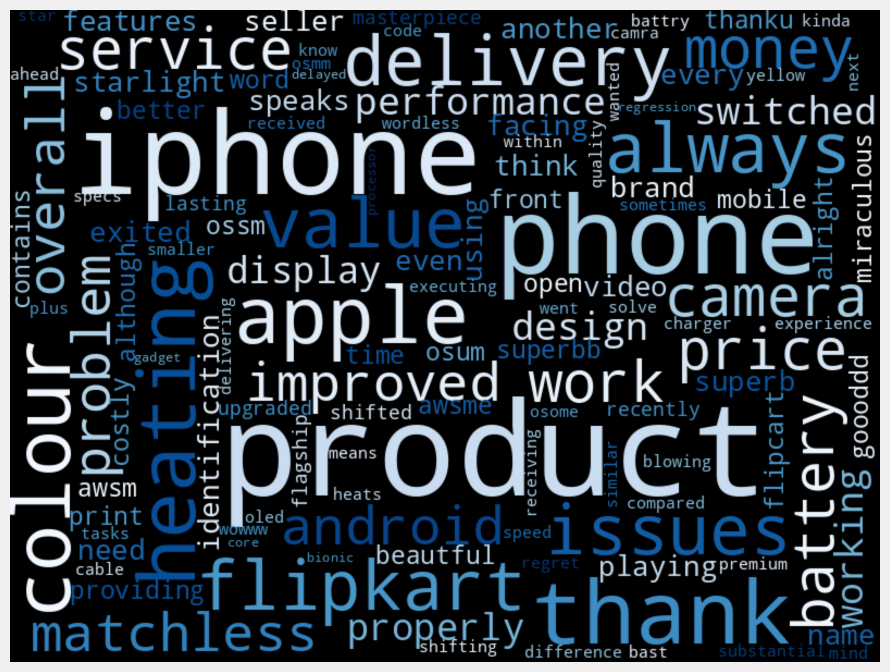

In [ ]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(nt_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

<Figure size 10000x1500 with 0 Axes>

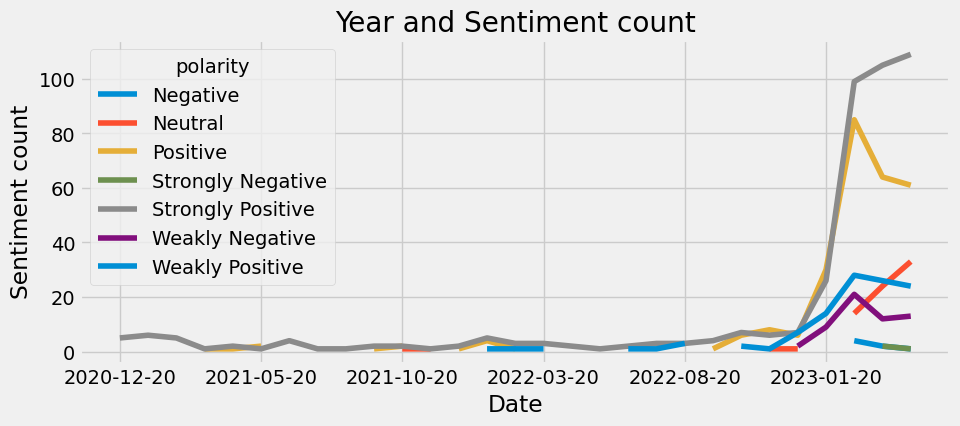

In [ ]:
#Date vs Sentiment Count
f = plt.figure()
f.set_figwidth(100)
f.set_figheight(15)

df.groupby(['date','polarity'])['polarity'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Date')
plt.ylabel('Sentiment count')

plt.show()

In [267]:
var = df['location'].value_counts()
var[:5]
keys = []
for k,v in var[:5].items():
  keys.append(k)

keys

['New Delhi', 'Bengaluru', 'Hyderabad', 'Kolkata', 'Fatehabad District']

In [268]:
new_df = df[df['location'].isin(keys)]

In [269]:
new_df['location'].value_counts()

New Delhi             68
Bengaluru             41
Hyderabad             27
Kolkata               22
Fatehabad District    21
Name: location, dtype: int64

<Figure size 10000x1500 with 0 Axes>

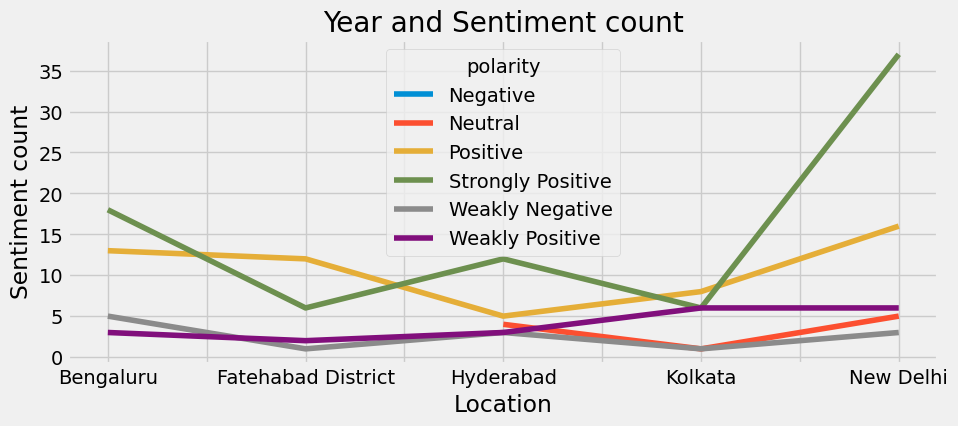

In [271]:
#Location vs Sentiment Count
f = plt.figure()
f.set_figwidth(100)
f.set_figheight(15)

new_df.groupby(['location','polarity'])['polarity'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Location')
plt.ylabel('Sentiment count')

plt.show()

TypeError: ignored

<Figure size 10000x1500 with 0 Axes>

In [ ]:
df['location'].value_counts().head(10)

New Delhi             68
Bengaluru             41
Hyderabad             27
Kolkata               22
Fatehabad District    21
Pune                  18
Mumbai                18
Ahmedabad             16
Ghaziabad             15
Gurugram              14
Name: location, dtype: int64